In [9]:
#Loading in the Dataset
import pandas as pd
df = pd.read_csv("C:/Users/Ken Mori/Documents/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")

        Year                    Major                University  Time  \
0     Year 2                  Physics  Indiana State University    12   
1     Year 3                Chemistry     Ball State University    14   
2     Year 3                Chemistry         Butler University    12   
3     Year 2                  Biology  Indiana State University    11   
4     Year 3  Business Administration         Butler University    12   
...      ...                      ...                       ...   ...   
4995  Year 2              Mathematics     Ball State University    11   
4996  Year 3                Astronomy  Indiana State University    12   
4997  Year 3                Chemistry         Butler University    13   
4998  Year 3                Astronomy         Butler University    15   
4999  Year 2                Economics  University of Notre Dame    15   

                                                  Order  
0                                  Fried Catfish Basket  
1      

In [13]:
#Looking at sample contents of the dataset
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [12]:
#Looking at all the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


Looking at the datset, there are 5000 rows of data with 5 columns: The year the student is in, the major they are pursuing, the university they are attending, the time they ordered the food,
and the order that they made.

In [14]:
#Finding the summary statistics of the dataset
df.describe()

,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


Looking at the summary statistics, the mean for the time that students order food from the truck is between 12 to 1 PM. The value of the mean makes sense due to the time period being Lunch.
The minimum time anybody orders food is 8 AM. The minimum time could be due to the food truck opening at 8 AM. The latest time anyone orders food is 5 PM. This could be the latest time that any student could order food from the truck before the food truck closes. 

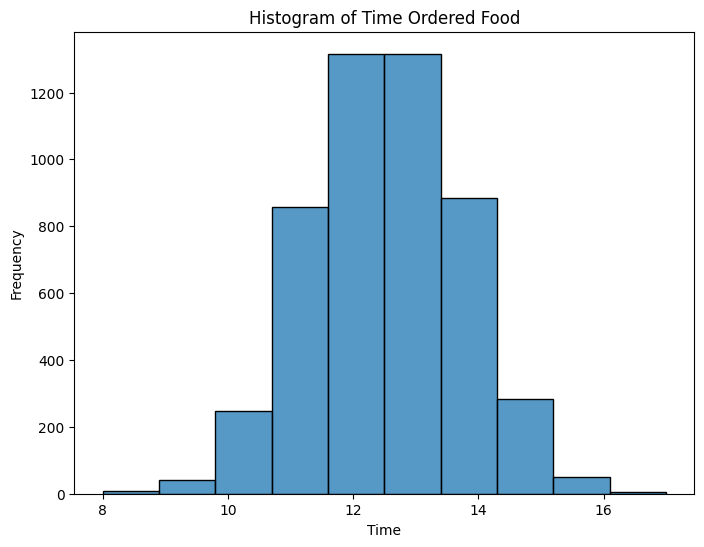

In [23]:
#Looking at visualizations of the dataset
import matplotlib.pyplot as plt
import seaborn as sns

#The easiest way to view the biases and distribtuion of a dataset is through a histogram, so I am implementing a histogram of the data.
plt.figure(figsize=(8, 6))
sns.histplot(df['Time'], bins=10)
plt.title('Histogram of Time Ordered Food')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

From the histogram below, we can see that the histogram is nearly symmetric and unimodal, meaning that the times has a normal distribution. The most common times to order food are around lunch time from 12 PM to 2 PM. Since the data is unimodal and symmetric, the mean of the times is around equal to the median of the times. There is no apparent skew or outliers from the histogram. 

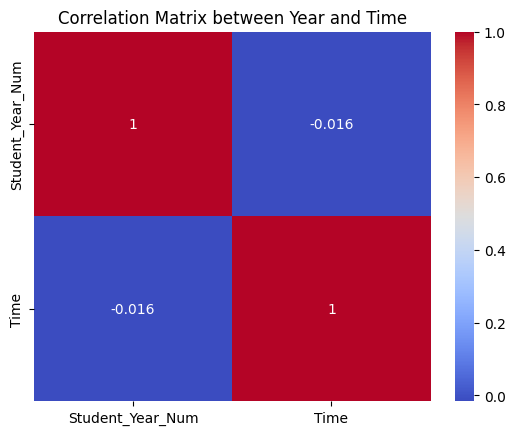

In [32]:
#Adding a correlation matrix to view any potential relationships between the columns of the data

#For this, I am going to be taking the year of each student(ie. year 2 = 2) and comparing it with the time they order food
df['Student_Year_Num'] = df['Year'].str.extract('(\d+)').astype(float)


year_time = df[['Student_Year_Num', 'Time']].corr()
sns.heatmap(year_time, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Year and Time')
plt.show()

Seems like there is no correlation between student year and time they order food, which makes sense as there is no variable factor that affects when they get food. 

In [34]:
#I am going to try to see if there is a correlation between the year of student and what food they get. 
#I will also make another heatmap to see if there is a correlation between time and what food the students ordered.
#Seeing all the food options within the dataset
order_unique = df['Order'].unique()
print(order_unique)

#Making a new column that labels the orders by number
order_label = {value: label for label, value in enumerate(order_unique)}
df['Order_Label'] = df['Order'].map(order_label)

['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Indiana Buffalo Chicken Tacos (3 tacos)' 'Sweet Potato Fries'
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Breaded Pork Tenderloin Sandwich' 'Cornbread Hush Puppies'
 'Hoosier BBQ Pulled Pork Sandwich']


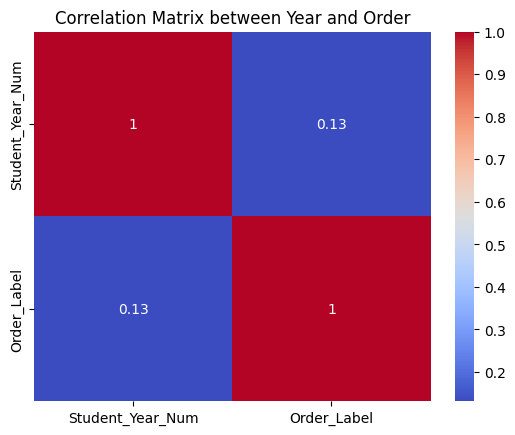

In [40]:
#Making first heatmap(year vs order)
year_order = df[['Student_Year_Num', 'Order_Label']].corr()
sns.heatmap(year_order, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Year and Order')
plt.show()

While there is a larger value of correlation between order and the year of student, there still doesn't seem to be any correlation between the two. I will proceed to make a heatmap between order and time of order

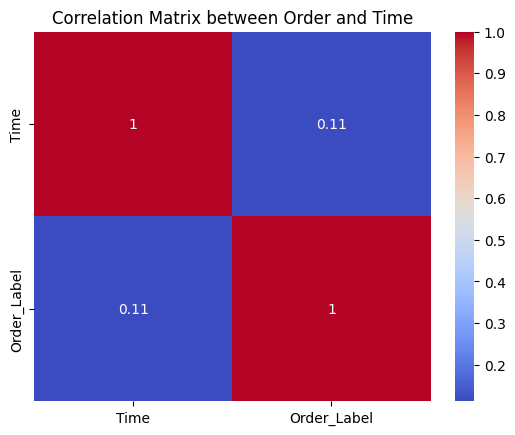

In [41]:
#Making second heatmap(time vs order)
time_order = df[['Time', 'Order_Label']].corr()
sns.heatmap(time_order, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Order and Time')
plt.show()

Interestingly, there doesn't seem to be any correlation between the order and the time of order. The next steps will be to see if there is a correlation between the major of the student between the rest of the 2 variables. 

In [42]:
#Getting each of the majors from the dataset
major_unique = df['Major'].unique()
print(major_unique)

#Making a new column that labels the orders by number
major_label = {value: label for label, value in enumerate(major_unique)}
df['Major_Label'] = df['Major'].map(major_label)

['Physics' 'Chemistry' 'Biology' 'Business Administration' 'Anthropology'
 'Mathematics' 'Economics' 'Astronomy' 'Marketing' 'Political Science'
 'Finance' 'Sociology' 'Accounting' 'Psychology' 'International Business'
 'Music' 'Mechanical Engineering' 'Philosophy' 'Fine Arts'
 'Civil Engineering']


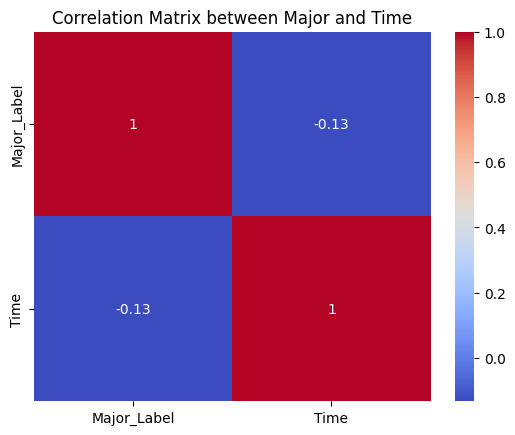

In [43]:
#First heatmap between time and major
time_major = df[['Major_Label', 'Time']].corr()
sns.heatmap(time_major, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Major and Time')
plt.show()

Nothing of value to be gained. Second heatmap of Major and Order

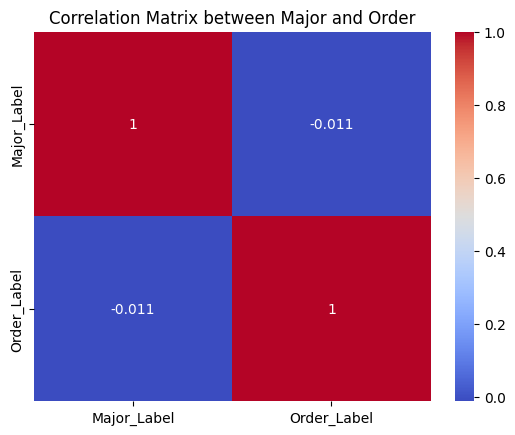

In [45]:
#Second heatmap between order and major
order_major = df[['Major_Label', 'Order_Label']].corr()
sns.heatmap(order_major, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Major and Order')
plt.show()

Again, nothing of value to be gained. Let's try the last corrrelation between Major and Year

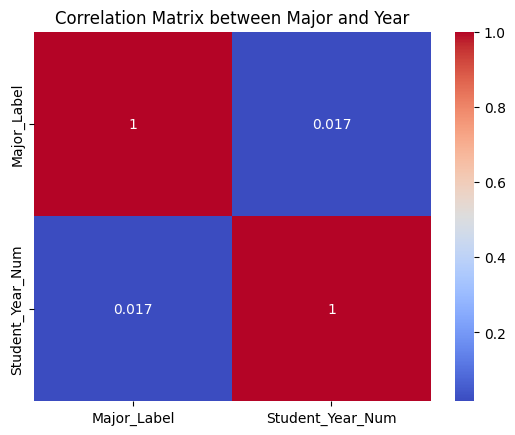

In [46]:
#Second heatmap between year and major
year_major = df[['Major_Label', 'Student_Year_Num']].corr()
sns.heatmap(year_major, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Major and Year')
plt.show()

So far, it doesn't seem like there are any columns within the dataset that have a strong correlation with each other. The last try is to see if the university has a correlation any of these other columns